In [77]:
import nest
import network
import addons
import numpy as np
from network_params import net_dict
import network_params
from sim_params import sim_dict
from stimulus_params import stim_dict
from scipy.signal import argrelextrema

In [78]:
##### NUMERO DE NEURONAS
name = "stimulation/data_pulse_packet_example/"
neuron_id = np.loadtxt(name + "population_nodeids.dat",dtype=int)
num_neurons = []
for i in range(len(neuron_id)):
    num_neurons = np.append(num_neurons,int(neuron_id[i][1]-neuron_id[i][0]+1))
num_neurons = num_neurons.astype(int)

voltage_data = addons.load_data(name,"voltmeter",)
time_data = voltage_data[0]["time_ms"][0::num_neurons[0]]
#time_data = addons.get_time(voltage_data,num_neurons[0]) 
data_pop = {}
ex_current_pop = {}
in_current_pop = {}
pop_activity = {}
names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]
for i in range(len(num_neurons)):
    data_pop[i] = addons.split_data(voltage_data[i], num_neurons[i])

del(voltage_data)
ex_current_data = addons.load_data(name,"ex_current",type="Current")
for i in range(len(num_neurons)):
    ex_current_pop[i] = addons.split_data(ex_current_data[i],num_neurons[i],type="Current")

del(ex_current_data)
in_current_data = addons.load_data(name,"in_current",type="Current")
for i in range(len(num_neurons)):
    in_current_pop[i] = addons.split_data(in_current_data[i], num_neurons[i],type="Current")

del(in_current_data)

for i in range(len(num_neurons)):
    pop_activity[names[i]] = np.loadtxt(name + "measurements/pop_activities/pop_activity_"+str(i)+".dat")


In [79]:
import random
import helpers
def prepare_data(data_pop,ex_current_pop,in_current_pop):
    sd_names, node_ids, data = helpers.__load_spike_times(name,"spike_recorder",addons.analysis_dict["analysis_start"], addons.analysis_dict["analysis_end"])

    times = {}
    data_voltages = { }
    data_excitatory = {}
    data_inhibitory = {}
    bins = {}

    names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]



    for i in range(len(data_pop)):
        random.shuffle(data_pop[i])
        random.shuffle(ex_current_pop[i])
        random.shuffle(in_current_pop[i])
        data_voltages[names[i]] =  np.mean(data_pop[i][0:1000],axis=0)
        data_excitatory[names[i]] = np.mean(ex_current_pop[i][0:1000],axis=0)
        data_inhibitory[names[i]] = np.mean(in_current_pop[i][0:1000],axis=0)
        neurons = np.unique(data[i]["sender"]) 
        random.shuffle(neurons)
        chosen_ones = neurons[1:1000]
        indices = []
        for indx in chosen_ones:
            indices = np.append(indices,np.where(data[i]["sender"]==indx))
        indices = np.array(indices,dtype=int)
        times_help = data[i][indices]["time_ms"] 
        times[names[i]], bins[names[i]] = np.histogram(data[i][indices]["time_ms"], bins = int(addons.analysis_dict["analysis_end"]-addons.analysis_dict["analysis_start"]/addons.analysis_dict["bin_size"]))

    #return data_voltages, times, times_help
    return data_voltages, data_excitatory, data_inhibitory, times, times_help

In [80]:
data_voltages, data_excitatory, data_inhibitory, times, times_help = prepare_data(data_pop,ex_current_pop,in_current_pop)

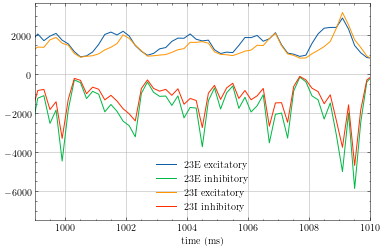

In [81]:
import matplotlib.pyplot as plt 

time_plot = np.linspace(addons.analysis_dict["analysis_start"],addons.analysis_dict["analysis_end"],num=int((addons.analysis_dict["analysis_end"]-addons.analysis_dict["analysis_start"])/0.2))

plt.plot(time_plot,data_excitatory["L23E"], label = '23E excitatory')
plt.plot(time_plot,data_inhibitory["L23E"],label = '23E inhibitory')
plt.plot(time_plot,data_excitatory["L23I"], label = '23I excitatory')
plt.plot(time_plot,data_inhibitory["L23I"],label = '23I inhibitory')
plt.xlim(999,1010)
plt.xlabel('time (ms)')
plt.legend()
plt.grid()

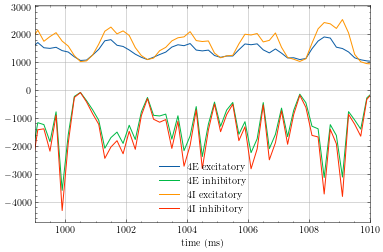

In [82]:
time_plot = np.linspace(addons.analysis_dict["analysis_start"],addons.analysis_dict["analysis_end"],num=int((addons.analysis_dict["analysis_end"]-addons.analysis_dict["analysis_start"])/0.2))

plt.plot(time_plot,data_excitatory["L4E"], label = '4E excitatory')
plt.plot(time_plot,data_inhibitory["L4E"],label = '4E inhibitory')
plt.plot(time_plot,data_excitatory["L4I"], label = '4I excitatory')
plt.plot(time_plot,data_inhibitory["L4I"],label = '4I inhibitory')
plt.xlim(999,1010)
plt.xlabel('time (ms)')
plt.legend()
plt.grid()

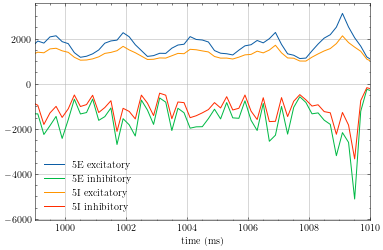

In [83]:
time_plot = np.linspace(addons.analysis_dict["analysis_start"],addons.analysis_dict["analysis_end"],num=int((addons.analysis_dict["analysis_end"]-addons.analysis_dict["analysis_start"])/0.2))

plt.plot(time_plot,data_excitatory["L5E"], label = '5E excitatory')
plt.plot(time_plot,data_inhibitory["L5E"],label = '5E inhibitory')
plt.plot(time_plot,data_excitatory["L5I"], label = '5I excitatory')
plt.plot(time_plot,data_inhibitory["L5I"],label = '5I inhibitory')
plt.xlim(999,1010)
plt.xlabel('time (ms)')
plt.legend()
plt.grid()

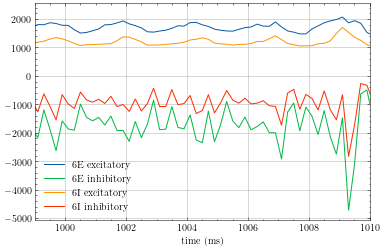

In [84]:
time_plot = np.linspace(addons.analysis_dict["analysis_start"],addons.analysis_dict["analysis_end"],num=int((addons.analysis_dict["analysis_end"]-addons.analysis_dict["analysis_start"])/0.2))

plt.plot(time_plot,data_excitatory["L6E"], label = '6E excitatory')
plt.plot(time_plot,data_inhibitory["L6E"],label = '6E inhibitory')
plt.plot(time_plot,data_excitatory["L6I"], label = '6I excitatory')
plt.plot(time_plot,data_inhibitory["L6I"],label = '6I inhibitory')
plt.xlim(999,1010)
plt.xlabel('time (ms)')
plt.legend()
plt.grid()

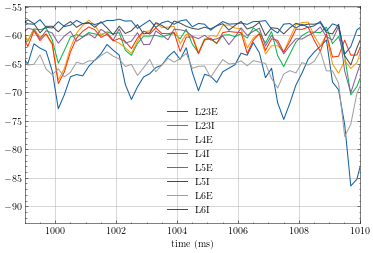

In [85]:
time_plot = np.linspace(addons.analysis_dict["analysis_start"],addons.analysis_dict["analysis_end"],num=int((addons.analysis_dict["analysis_end"]-addons.analysis_dict["analysis_start"])/0.2))
pop= [ 'L23E', 'L23I', 'L4E', 'L4I', 'L5E', 'L5I', 'L6E', 'L6I']

for i in range(len(data_voltages)):
    plt.plot(time_plot,data_voltages[pop[i]],label = pop[i])


plt.xlim(999,1010)
plt.xlabel('time (ms)')
plt.legend()
plt.grid()